# What is the optimal number of topics generated by LDA?

This question should answer what number of topics is optimal. The number of topics is written as k. To answer this question LDA is applied multiple times on the entire data set. Each run the number of generated topics has been set to a specific number k. If key-words are in multiple topics, this can indicates that k is too high.

In [ ]:
Libaries are imported

In [3]:
import pandas as pd 
import re
import gensim
import numpy as np
from gensim.models import Word2Vec
from gensim import corpora, models
from gensim.models import CoherenceModel
import gensim.models.ldamodel
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
Loading dataset

In [4]:
df = pd.read_csv("/home/sije/Thesis/data/twitter_dataset.csv", delimiter = ';')

464845


Function which returns perplexity score for a given LDA model, which is trained on 50000 messages. 

In [9]:
def perplexity(number):
    messages = []
    message = df['message']
    count = 0
    for string in message:
        count += 1
        p = re.compile('@[a-zA-Z]+')
        findall = p.findall(str(string))
        string = re.sub(r'@[a-zA-Z]+', '', str(string))
        string = re.sub(r'[^a-zA-Z ]', '', str(string))
        messages.append(str(string).lower().split())

    
    selected_messages = messages[0:48000]

    dictionary = gensim.corpora.Dictionary(selected_messages)
    dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=10000)
    bow_corpus = [dictionary.doc2bow(doc) for doc in selected_messages]
    lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=number, id2word=dictionary, passes=2, workers=2)
    Perplexity = lda_model.log_perplexity(bow_corpus)
    return(Perplexity)


Perplexity is caculated for k  in range (2, 30).

In [65]:
values_perplexity = []
for x in range(2,30):
    values_perplexity.append(perplexity(x))
keys_perplexity = []
for x in range(2,30):
    keys_perplexity.append(x)

Perplexity score is shown for k in range (2, 30).

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
[-6.130170283960366, -6.000602073227981, -5.757711323238447, -5.604578958033258, -5.440688726574611, -5.538930404960224, -5.552886143535116, -5.441831844002315, -5.39640135297836, -5.443277682297998, -5.321446331759077, -5.252918320773085, -5.263726168531872, -5.296206812939708, -5.276845773703087, -5.26255264898652, -5.32523204262413, -5.254303919612245, -5.230457781504842, -5.207308416229898, -5.188541991528567, -5.13682609479957, -5.229135808784682, -5.240989776740618, -5.20794680460732, -5.1777256443931, -5.213417454917524, -5.2229834552373395]


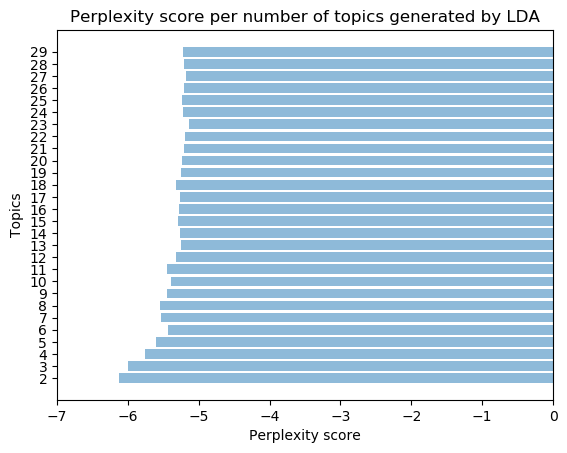

In [56]:
y_pos = np.arange(len(keys_perplexity))
print(keys_perplexity)
print(values_perplexity)


plt.barh(y_pos, values_perplexity, align='center', alpha=0.5)
plt.yticks(y_pos, keys_perplexity)
plt.xlabel('Perplexity score')
plt.ylabel('Topics')
plt.xlim(-7,0)
plt.title('Perplexity score per number of topics generated by LDA')

plt.show()

The perplexity score per topic number generated by LDA are shown in the figure above. Perplexity indicates how  well the  model describes a set of documents. Perplexity is equivalent to the inverse of the geometric mean a  lower perplexity implies data is more likely. As such, as the number of topics increase, the perplexity of the  model should decrease. Therefore a lower perplexity suggests a better fit. The lowest perplexity is achieved using  k = 2 . Which results in perplexity score of -6.13.

Function which returns coherence score for a given LDA model, which is trained on 50000 messages. 

In [55]:
def coherence(number):
    message = df['message']
    messages = []
    count = 0
    for string in message:
        count += 1
        p = re.compile('@[a-zA-Z]+')
        findall = p.findall(str(string))
        string = re.sub(r'@[a-zA-Z]+', '', str(string))
        string = re.sub(r'[^a-zA-Z ]', '', str(string))
        messages.append(str(string).lower().split())

    
    selected_messages = messages[0:50000]

    dictionary = gensim.corpora.Dictionary(selected_messages)
    dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=10000)
    bow_corpus = [dictionary.doc2bow(doc) for doc in selected_messages]
    lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=number, id2word=dictionary, passes=2, workers=2)
    id2word = corpora.Dictionary(selected_messages)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=selected_messages, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    Coherence_Score = coherence_lda
    return(Coherence_Score)

Coherence is caculated for k in range (2, 30).

In [46]:
values_coherence = []
for x in range(2,30):
    values_coherence.append(coherence(x))
keys_coherence = []
for x in range(2,30):
    keys_coherence.append(x)

Coherence score is shown for k in range (2, 30).

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


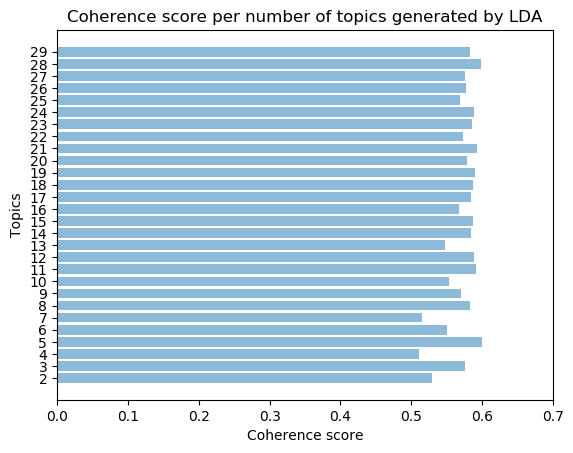

In [51]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

y_pos = np.arange(len(keys_coherence))

print(y_pos)
print(keys_coherence)

plt.barh(y_pos, values_coherence, align='center', alpha=0.5)
plt.yticks(y_pos, keys_coherence)
plt.xlabel('Coherence score')
plt.ylabel('Topics')
plt.xlim(0,0.7)
plt.title('Coherence score per number of topics generated by LDA')

plt.show()

The coherence score per topic number generated by LDA are  shown. A higher coherence score indicates a better fit. The highest score is generated with k = 4.  In the following sub-question an a optimal number for k should be selected. The optimal number of k is different between perplexity and coherence score. The following question can be performed with value for k which is in between 2 and 4.s